In [1]:
# importing the pandas module
import pandas as pd

# importing the data set
data = pd.read_csv('Dataset-3.csv')

# printing the fist few data set
data.head()

,Mean1,Variance1,Skewness1,Kurtosis1,Contrast1,Entropy1,Energy1,Homo1,Corre1,Mean2,...,Mean3,Variance3,Skewness3,Kurtosis3,Contrast3,Entropy3,Energy3,Homo13,Corre3,Class
0,42.309998,83.484414,1.818016,1.807846,1.467045,3731.006605,0.703142,0.870627,0.732727,32.688538,...,165.165817,93.981039,-1.134481,-0.590945,1.652185,5565.156755,0.644235,0.883303,0.685422,1
1,39.366226,82.120006,1.939550,2.232114,1.401411,3436.584393,0.730720,0.890305,0.745583,32.111114,...,173.271973,91.703587,-1.318133,-0.169259,1.606052,4818.707161,0.676147,0.896975,0.713930,1
2,37.898514,84.257568,2.053724,2.472865,1.373625,10382.321200,0.666713,0.710450,0.271062,55.942551,...,162.537750,82.835883,-1.117115,-0.054858,2.162610,12243.344090,0.560580,0.695629,0.111088,1
3,38.373337,82.488351,2.026605,2.479962,1.485618,9399.336734,0.649457,0.695477,0.311426,54.772614,...,161.510162,82.691970,-1.137138,-0.034112,2.125591,11964.657400,0.557702,0.691261,0.128169,1
4,39.092346,80.643568,1.973096,2.389773,1.664926,8257.256189,0.640832,0.689191,0.367061,48.296722,...,162.340897,81.835853,-1.258373,0.122907,2.121965,11100.566650,0.573414,0.694173,0.174132,1


In [2]:
# getting the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mean1      140 non-null    float64
 1   Variance1  140 non-null    float64
 2   Skewness1  140 non-null    float64
 3   Kurtosis1  140 non-null    float64
 4   Contrast1  140 non-null    float64
 5   Entropy1   140 non-null    float64
 6   Energy1    140 non-null    float64
 7   Homo1      140 non-null    float64
 8   Corre1     140 non-null    float64
 9   Mean2      140 non-null    float64
 10  Variance2  140 non-null    float64
 11  Skewness2  140 non-null    float64
 12  Kurtosis2  140 non-null    float64
 13  Contrast2  140 non-null    float64
 14  Entropy2   140 non-null    float64
 15  Energy2    140 non-null    float64
 16  Homo2      140 non-null    float64
 17  Corre2     140 non-null    float64
 18  Mean3      140 non-null    float64
 19  Variance3  140 non-null    float64
 20  Skewness3 

In [3]:
# dividint the dataset into inputs and outputs
# storing the input values in the X variable
import numpy as np
# split the data into inputs and outputs
X = data.iloc[:, : -1].values     #all the columns except the last column, dropping the last columm
y = np.array(data.iloc[:, -1].values)    #droping all the columns and taking the last column as output

In [4]:
# importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split
# splitting the data 
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30, random_state=0)

In [5]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
classifier = RandomForestClassifier()

# fit the model
classifier.fit(X_train, y_train)
# predicting the outcome

y_pred= classifier.predict(X_test)

# printing the output
print(y_pred)


[0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 1 0 0]


In [6]:
# importing accuracy_score
from sklearn.metrics import accuracy_score
# printing accuracy
print(accuracy_score(y_test,y_pred))

0.8333333333333334


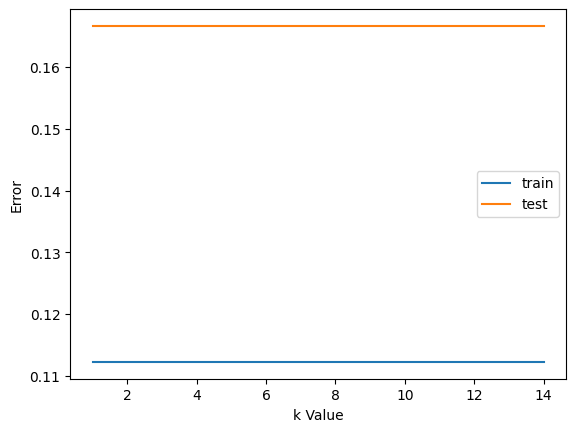

In [7]:
import matplotlib.pyplot as plt
error1= []
error2= []
# for loop 
for k in range(1,15):
    RFc = RandomForestClassifier()
    RFc.fit(X_train, y_train)
    y_pred1 = RFc.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = RFc.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# plotting the graphs for testing and training 
plt.plot(range(1,15), error1, label="train")
plt.plot(range(1,15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()


In [9]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.64      0.82      0.72        11

    accuracy                           0.83        42
   macro avg       0.79      0.83      0.80        42
weighted avg       0.85      0.83      0.84        42

